In [9]:
import os
import pandas as pd
import numpy as np
import tweepy
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv

In [10]:

# load the .env file variables
load_dotenv()

# your app code here
consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

In [11]:
# Creamos cliente
client = tweepy.Client( bearer_token=bearer_token,
consumer_key=consumer_key,
consumer_secret=consumer_secret,
return_type = requests.Response,
wait_on_rate_limit=True)


In [12]:
# definiendo query para twiter
query = '#100daysofcode (pandas OR python) -is:retweet'


In [13]:
tweets = client.search_recent_tweets(query=query,
tweet_fields=['author_id','created_at','lang'],
max_results=100)

In [14]:
# Save as dictionary
tweets_dict = tweets.json()
tweets_dict.keys()

dict_keys(['data', 'meta'])

In [15]:
# Extract data
tweets_data = tweets_dict['data']

In [16]:
# Transform to pandas DF
df = pd.json_normalize(tweets_data)

In [17]:
df.head()

,created_at,id,lang,text,author_id
0,2022-06-20T00:15:20.000Z,1538676839488577541,en,We offer Legit &amp; Quality academic solution...,1319980675504742400
1,2022-06-20T00:13:57.000Z,1538676490283253760,en,We deliver unique work 🌸 \n 🍁 DM for value-b...,1343372118
2,2022-06-20T00:12:10.000Z,1538676042943979520,und,😍https://t.co/lfwMhx56PH\n\n#US #Canada #UK #h...,1459057388237950981
3,2022-06-20T00:11:20.000Z,1538675833908482054,en,"Hello, kindly send us details of your assignme...",1319980675504742400
4,2022-06-20T00:10:00.000Z,1538675496480808960,en,NEED a #JOB?\nSign up now https://t.co/o7lVlsl...,1332714745871421443


In [18]:
df.to_csv('coding-tweets.csv')

### Search for the words

In [19]:
import re

In [20]:
def word_in_text(word,tweet):
    t=tweet
    t=t.lower()
    w=re.compile(word)
    if w.search(t) is not None :
        return('Si')
    else :
            return('No')

In [25]:
#testing the function
word_in_text('pandas','the best lenguage is Pandas')

'Si'

In [22]:
n_py=0
n_pd=0

for lab,row in df.iterrows():
    if word_in_text('python',row['text']) == 'Si' :
        n_py+=1
    if word_in_text('pandas',row['text']) == 'Si' :
        n_pd+=1
    
print (f'Python {n_py} // Pandas {n_pd}')

Python 99 // Pandas 0


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


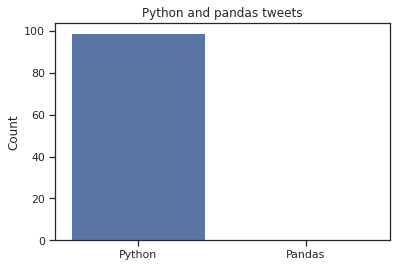

In [23]:
sns.set_theme(style="ticks", color_codes=True)

cd=['Python','Pandas']

ax = sns.barplot(cd,[n_py,n_pd])
ax.set(ylabel='Count',title='Python and pandas tweets')
plt.show()